In [ ]:
import numpy as np
import gym
from gym import spaces
import random

# Mock network load data (simulating traffic patterns for training)
np.random.seed(42)
network_load_data = np.random.randint(1, 100, size=1000)  # Traffic load values between 1 and 100

# Define custom environment for 5G energy optimization
class EnergyOptimizationEnv(gym.Env):
    def __init__(self):  # Corrected method name
        super(EnergyOptimizationEnv, self).__init__()
        self.action_space = spaces.Discrete(2)  # 0 = Normal Mode, 1 = Power-Saving Mode
        self.observation_space = spaces.Box(low=1, high=100, shape=(1,), dtype=np.int32)
        self.current_step = 0
        self.total_energy_consumption = 0
        self.energy_consumed_normal = 10  # Energy in normal mode
        self.energy_consumed_power_save = 3  # Energy in power-saving mode

    def reset(self):
        self.current_step = 0
        self.total_energy_consumption = 0
        return [network_load_data[self.current_step]]

    def step(self, action):
        load = network_load_data[self.current_step]
        if action == 1 and load < 20:  # Power-saving mode if load is low
            energy_used = self.energy_consumed_power_save
            reward = 10  # Positive reward for saving energy
        else:
            energy_used = self.energy_consumed_normal
            reward = -1 if load > 80 and action == 1 else 0  # Penalty if high load in power-saving

        self.total_energy_consumption += energy_used
        self.current_step += 1
        done = self.current_step >= len(network_load_data) - 1
        next_state = [network_load_data[self.current_step]] if not done else [0]

        return next_state, reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Total Energy Consumption: {self.total_energy_consumption}")

# Q-learning algorithm
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.95, epsilon=1.0, epsilon_decay=0.995):
    q_table = np.zeros((101, env.action_space.n))  # State-action values
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            state_idx = state[0]
            if random.uniform(0, 1) < epsilon:  # Epsilon-greedy strategy
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state_idx])

            next_state, reward, done, _ = env.step(action)
            next_state_idx = next_state[0]
            q_value = q_table[state_idx, action]
            best_next_q = np.max(q_table[next_state_idx])

            # Update Q-value
            q_table[state_idx, action] = (1 - alpha) * q_value + alpha * (reward + gamma * best_next_q)

            state = next_state

        epsilon *= epsilon_decay  # Decay epsilon after each episode

    return q_table

# Train the model
env = EnergyOptimizationEnv()
q_table = q_learning(env)
   
# Print Q-table
print("Training complete. Q-table values:")
print(q_table)

# Test the trained model
state = env.reset()
done = False
while not done:
    state_idx = state[0]
    action = np.argmax(q_table[state_idx])  # Choose the best action based on the Q-table
    state, reward, done, _ = env.step(action)
    env.render()


Training complete. Q-table values:
[[ 0.          0.        ]
 [42.96117107 51.32622779]
 [38.89995576 49.1606484 ]
 [38.18235367 48.76440056]
 [40.30067836 50.94849966]
 [39.35846974 49.22227262]
 [37.77091964 46.73314766]
 [40.68235361 50.68693813]
 [39.13480817 49.02191437]
 [37.72035536 47.62603573]
 [40.08773318 48.69619218]
 [38.8578164  48.8740878 ]
 [37.95337473 47.84506394]
 [38.4408415  47.54057305]
 [38.44331258 48.94566833]
 [37.48187036 47.44434192]
 [40.17941809 49.06376005]
 [36.88589329 48.1391534 ]
 [37.79440351 48.06803867]
 [39.44019924 48.29601758]
 [38.3340156  37.41008591]
 [39.03636571 37.78249815]
 [36.70710255 36.91288713]
 [38.82084742 40.42815873]
 [39.14014546 38.03288473]
 [37.27768132 38.48026363]
 [39.38238467 38.08951224]
 [38.50134146 39.10493254]
 [37.93206772 38.30907145]
 [41.9332218  40.45375474]
 [40.0670356  38.38696033]
 [44.0512071  42.74498476]
 [37.08609523 37.26322678]
 [37.43093802 37.33012292]
 [38.80128586 40.48682335]
 [37.95043999 36.880

Step: 1, Total Energy Consumption: 10
Step: 2, Total Energy Consumption: 20
Step: 3, Total Energy Consumption: 23
Step: 4, Total Energy Consumption: 33
Step: 5, Total Energy Consumption: 43
Step: 6, Total Energy Consumption: 53
Step: 7, Total Energy Consumption: 63
Step: 8, Total Energy Consumption: 73
Step: 9, Total Energy Consumption: 83
Step: 10, Total Energy Consumption: 93
Step: 11, Total Energy Consumption: 103
Step: 12, Total Energy Consumption: 113
Step: 13, Total Energy Consumption: 116
Step: 14, Total Energy Consumption: 126
Step: 15, Total Energy Consumption: 136
Step: 16, Total Energy Consumption: 139
Step: 17, Total Energy Consumption: 149
Step: 18, Total Energy Consumption: 159
Step: 19, Total Energy Consumption: 169
Step: 20, Total Energy Consumption: 172
Step: 21, Total Energy Consumption: 182
Step: 22, Total Energy Consumption: 192
Step: 23, Total Energy Consumption: 202
Step: 24, Total Energy Consumption: 212
Step: 25, Total Energy Consumption: 222
Step: 26, Total Ene

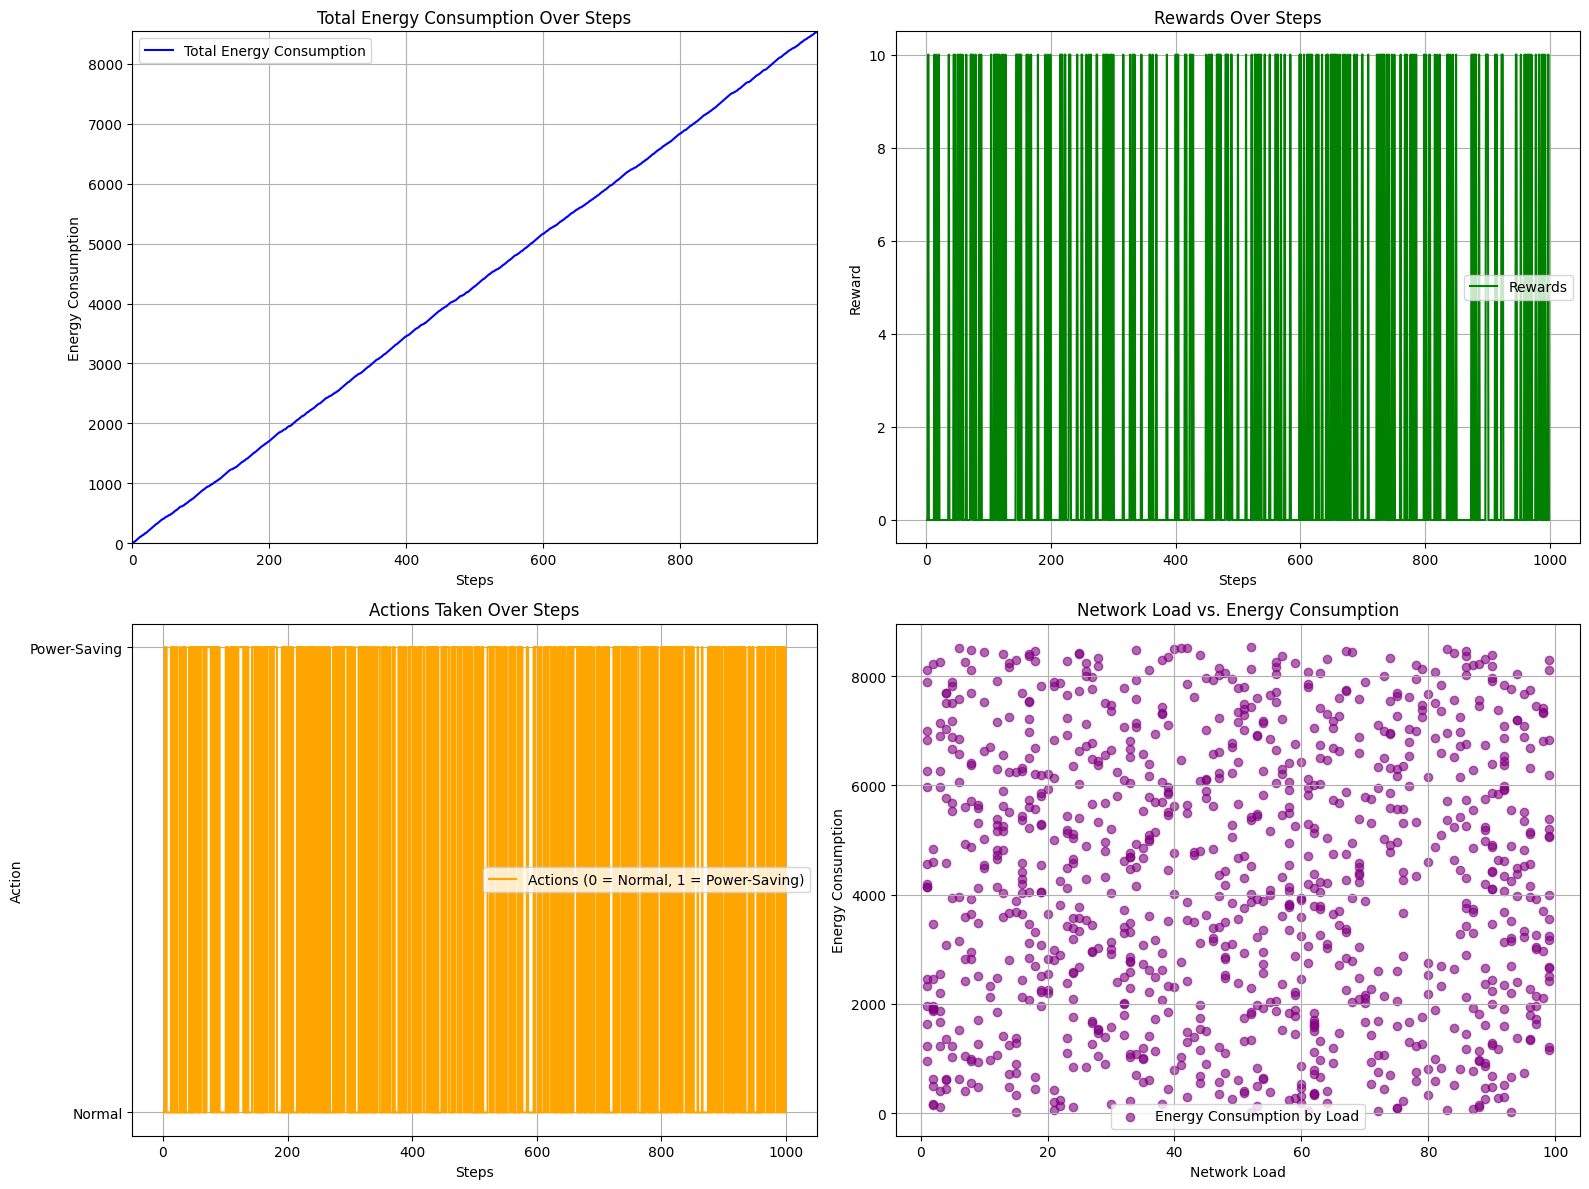

In [4]:
# Generate and collect data for analysis
state = env.reset()
done = False
steps = []
energy_consumptions = []
rewards = []
actions = []
loads = []

while not done:
    state_idx = state[0]
    action = np.argmax(q_table[state_idx])  # Choose the best action based on the Q-table
    state, reward, done, _ = env.step(action)
    steps.append(env.current_step)
    energy_consumptions.append(env.total_energy_consumption)
    rewards.append(reward)
    actions.append(action)
    loads.append(state_idx)
    env.render()

# Plotting multiple graphs
plt.figure(figsize=(16, 12))

# 1. Total Energy Consumption Over Steps
plt.subplot(2, 2, 1)
plt.plot(steps, energy_consumptions, label="Total Energy Consumption", color="blue")
plt.title("Total Energy Consumption Over Steps")
plt.xlabel("Steps")
plt.ylabel("Energy Consumption")
plt.ylim(0, max(energy_consumptions) + 10)  # Adjust y-axis range
plt.xlim(0, len(steps))  # Adjust x-axis range
plt.legend()
plt.grid()

# 2. Rewards Over Steps
plt.subplot(2, 2, 2)
plt.plot(steps, rewards, label="Rewards", color="green")
plt.title("Rewards Over Steps")
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.legend()
plt.grid()

# 3. Actions Taken Over Steps
plt.subplot(2, 2, 3)
plt.step(steps, actions, label="Actions (0 = Normal, 1 = Power-Saving)", color="orange", where="post")
plt.title("Actions Taken Over Steps")
plt.xlabel("Steps")
plt.ylabel("Action")
plt.yticks([0, 1], ["Normal", "Power-Saving"])
plt.legend()
plt.grid()

# 4. Network Load vs. Energy Consumption
plt.subplot(2, 2, 4)
plt.scatter(loads, energy_consumptions, label="Energy Consumption by Load", color="purple", alpha=0.6)
plt.title("Network Load vs. Energy Consumption")
plt.xlabel("Network Load")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()
